In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn

# Feature Engineering and Feature Transformation modules
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, RobustScaler 

# Feature Transformation modules 
from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

# Feature Selection and model selection modules 
from sklearn.feature_selection import RFE, VarianceThreshold, f_regression, SelectFromModel 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.feature_selection import f_regression, SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV, StratifiedKFold, cross_val_score


# Module of ML models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression, LassoCV, RidgeCV, ElasticNetCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC, SVR 
from xgboost import XGBRFRegressor, XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor 


# Layout Design 
sns.set_context("paper", font_scale = 1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 400)

# Evaluation Metric modules
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score

# Pipeline modules 
# First Inherit the base classes
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer 
from sklearn.pipeline import make_union, FeatureUnion
import pickle
import joblib

In [2]:
# Initializing random generators for models 
# Set a seed value
seed_value= 12321 

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
# import tensorflow as tf
# tf.set_random_seed(seed_value)

# 5. For layers that introduce randomness like dropout, make sure to set seed values 
# model.add(Dropout(0.25, seed=seed_value))

# 6. Configure a new global `tensorflow` session
# from keras import backend as K
# session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
# K.set_session(sess)

# Elementary Statistical Analysis

In [3]:
# Reading the dataset
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')
df_origin = pd.read_csv('datasets/ames_housing.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Identify if there exists an extra column in the original data which isn't present in provided train data
print(len(df_origin))
print()
extra_cols = [col for col in df_origin.columns if col not in df_train.columns]
print(extra_cols)

2930

['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC', 'Central Air', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC', 'Misc Feature',

**Observations**:
1. We can observe that the column names are different in original data as to provided train data
2. There is an extra feature named 'PID' - which is parcel identification number - can be used with city website for parcel review. Since its an Id, we will drop it

In [5]:
# Droppping the 'PID' feature 
df_origin.drop(['PID'], axis=1, inplace=True)

In [6]:
# Use the origin data as new training data
# df_train.columns = df_origin.columns
df_combined_train = df_origin
df_combined_train.drop_duplicates(inplace=True)
df_combined_train.columns = df_combined_train.columns.str.replace(' ', '')
print(df_combined_train.shape)

(2930, 81)


In [7]:
# Inspecting the train data
df_combined_train.head()

,Order,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemod/Add,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
# Inspecting the test dataset
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
# Gathering Appropriate Information 
# Drop 'Order' column from training data and 'Id' column from test data
df_combined_train.drop(['Order'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)
print(df_combined_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 0 to 2929
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2930 non-null   int64  
 1   MSZoning       2930 non-null   object 
 2   LotFrontage    2440 non-null   float64
 3   LotArea        2930 non-null   int64  
 4   Street         2930 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2930 non-null   object 
 7   LandContour    2930 non-null   object 
 8   Utilities      2930 non-null   object 
 9   LotConfig      2930 non-null   object 
 10  LandSlope      2930 non-null   object 
 11  Neighborhood   2930 non-null   object 
 12  Condition1     2930 non-null   object 
 13  Condition2     2930 non-null   object 
 14  BldgType       2930 non-null   object 
 15  HouseStyle     2930 non-null   object 
 16  OverallQual    2930 non-null   int64  
 17  OverallCond    2930 non-null   int64  
 18  YearBuil

In [10]:
# Remove duplicate values and change the wrong data types 
df_combined_train = df_combined_train.loc[~df_combined_train.index.duplicated(), :]
df_test = df_test.loc[~df_test.index.duplicated(), :]

# Hence, there is no column with dubious or incorrect data types

In [11]:
print(df_combined_train.shape)
print(df_test.shape)

(2930, 80)
(1459, 79)


In [12]:
# Getting insights of the features and outliers
df_combined_train.describe([0.25,0.50,0.75,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
99%,190.000000,135.610000,32988.920000,10.000000,9.000000,2008.000000,2009.000000,770.820000,1634.880000,874.440000,1776.160000,2197.200000,2286.810000,1399.100000,152.520000,2930.660000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1019.160000,500.710000,284.130000,264.000000,144.000000,259.710000,0.000000,971.000000,12.000000,2010.000000,456666.370000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [13]:
# Separate numerical and categorical columns
numerical_cols = [col for col in df_combined_train.columns if df_combined_train[col].dtype!='object']
categorical_cols = [col for col in df_combined_train.columns if df_combined_train[col].dtype=='object']

In [14]:
# Checking percentage of null values present in training dataset 
missing_num = df_combined_train.isna().sum().sort_values(ascending=False)
missing_perc = (df_combined_train.isna().sum()/len(df_combined_train)*100).sort_values(ascending=False)
missing_perc

PoolQC           99.556314
MiscFeature      96.382253
Alley            93.242321
Fence            80.477816
FireplaceQu      48.532423
LotFrontage      16.723549
GarageCond        5.426621
GarageFinish      5.426621
GarageYrBlt       5.426621
GarageQual        5.426621
GarageType        5.358362
BsmtExposure      2.832765
BsmtFinType2      2.764505
BsmtCond          2.730375
BsmtQual          2.730375
BsmtFinType1      2.730375
MasVnrArea        0.784983
MasVnrType        0.784983
BsmtFullBath      0.068259
BsmtHalfBath      0.068259
BsmtUnfSF         0.034130
GarageCars        0.034130
Electrical        0.034130
TotalBsmtSF       0.034130
BsmtFinSF1        0.034130
GarageArea        0.034130
BsmtFinSF2        0.034130
PavedDrive        0.000000
SaleCondition     0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
SaleType          0.000000
Y

EDA only for learning purposes done separately. Else you should always combine both the train and test sets and then only perform EDA for easier analysis. That is done later anyways.

In [15]:
# Calculating percentage of null values
def null_values(dataframe):
  missing_values = dataframe.isna().sum().sort_values(ascending=False)
  missing_perc = (((dataframe.isna().sum())/len(dataframe))*100).sort_values(ascending=False)
  return missing_values, missing_perc

#Passing in the training and test datasets to calculate the percentage of missing values in training and test data
null_sum_train, null_perc_train = null_values(df_combined_train)
null_sum_test, null_perc_test = null_values(df_test)

In [16]:
null_sum_train

PoolQC           2917
MiscFeature      2824
Alley            2732
Fence            2358
FireplaceQu      1422
LotFrontage       490
GarageCond        159
GarageFinish      159
GarageYrBlt       159
GarageQual        159
GarageType        157
BsmtExposure       83
BsmtFinType2       81
BsmtCond           80
BsmtQual           80
BsmtFinType1       80
MasVnrArea         23
MasVnrType         23
BsmtFullBath        2
BsmtHalfBath        2
BsmtUnfSF           1
GarageCars          1
Electrical          1
TotalBsmtSF         1
BsmtFinSF1          1
GarageArea          1
BsmtFinSF2          1
PavedDrive          0
SaleCondition       0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
3SsnPorch           0
EnclosedPorch       0
OpenPorchSF         0
FullBath  

In [17]:
null_perc_train

PoolQC           99.556314
MiscFeature      96.382253
Alley            93.242321
Fence            80.477816
FireplaceQu      48.532423
LotFrontage      16.723549
GarageCond        5.426621
GarageFinish      5.426621
GarageYrBlt       5.426621
GarageQual        5.426621
GarageType        5.358362
BsmtExposure      2.832765
BsmtFinType2      2.764505
BsmtCond          2.730375
BsmtQual          2.730375
BsmtFinType1      2.730375
MasVnrArea        0.784983
MasVnrType        0.784983
BsmtFullBath      0.068259
BsmtHalfBath      0.068259
BsmtUnfSF         0.034130
GarageCars        0.034130
Electrical        0.034130
TotalBsmtSF       0.034130
BsmtFinSF1        0.034130
GarageArea        0.034130
BsmtFinSF2        0.034130
PavedDrive        0.000000
SaleCondition     0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
SaleType          0.000000
Y

In [18]:
miss_train_sum_perc = pd.concat([null_sum_train, null_perc_train], axis=1, keys=['Sum', 'Percentage'])
miss_test_sum_perc = pd.concat([null_sum_test, null_perc_test], axis=1, keys=['Sum', 'Percentage'])

In [19]:
miss_train_plot = miss_train_sum_perc[miss_train_sum_perc['Percentage']>0]
miss_train_plot

,Sum,Percentage
PoolQC,2917,99.556314
MiscFeature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
FireplaceQu,1422,48.532423
LotFrontage,490,16.723549
GarageCond,159,5.426621
GarageFinish,159,5.426621
GarageYrBlt,159,5.426621
GarageQual,159,5.426621


In [20]:
miss_test_plot = miss_test_sum_perc[miss_test_sum_perc['Percentage']>0]
miss_test_plot

,Sum,Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127
GarageQual,78,5.346127
GarageCond,78,5.346127


**19 attributes have missing values and 5 features( PoolQC,MiscFeature,Alley,Fence,FireplaceQu) have missing percentage greater than 45%**

In [21]:
# Printing the numerical dataframe
df_numerical_train = df_combined_train.select_dtypes(include=['int64','float64'])
df_numerical_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900


In [22]:
# Printing the categorical dataframe
df_categorical_train = df_combined_train.select_dtypes(exclude=['int64','float64'])
df_categorical_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [23]:
# No.of unique values in each of the numerical columns
for col in df_numerical_train.columns:
    print(str(col)+"-"*len(str(col))+str(df_numerical_train[col].nunique()))

MSSubClass----------16
LotFrontage-----------128
LotArea-------1960
OverallQual-----------10
OverallCond-----------9
YearBuilt---------118
YearRemod/Add-------------61
MasVnrArea----------445
BsmtFinSF1----------995
BsmtFinSF2----------274
BsmtUnfSF---------1137
TotalBsmtSF-----------1058
1stFlrSF--------1083
2ndFlrSF--------635
LowQualFinSF------------36
GrLivArea---------1292
BsmtFullBath------------4
BsmtHalfBath------------3
FullBath--------5
HalfBath--------3
BedroomAbvGr------------8
KitchenAbvGr------------4
TotRmsAbvGrd------------14
Fireplaces----------5
GarageYrBlt-----------103
GarageCars----------6
GarageArea----------603
WoodDeckSF----------380
OpenPorchSF-----------252
EnclosedPorch-------------183
3SsnPorch---------31
ScreenPorch-----------121
PoolArea--------14
MiscVal-------38
MoSold------12
YrSold------5
SalePrice---------1032


In [24]:
# No.of unique values in each of the categorical columns
for col in df_categorical_train.columns:
    print(str(col)+"-"*len(str(col))+str(df_categorical_train[col].nunique()))

MSZoning--------7
Street------2
Alley-----2
LotShape--------4
LandContour-----------4
Utilities---------3
LotConfig---------5
LandSlope---------3
Neighborhood------------28
Condition1----------9
Condition2----------8
BldgType--------5
HouseStyle----------8
RoofStyle---------6
RoofMatl--------8
Exterior1st-----------16
Exterior2nd-----------17
MasVnrType----------5
ExterQual---------4
ExterCond---------5
Foundation----------6
BsmtQual--------5
BsmtCond--------5
BsmtExposure------------4
BsmtFinType1------------6
BsmtFinType2------------6
Heating-------6
HeatingQC---------5
CentralAir----------2
Electrical----------5
KitchenQual-----------5
Functional----------8
FireplaceQu-----------5
GarageType----------6
GarageFinish------------3
GarageQual----------5
GarageCond----------5
PavedDrive----------3
PoolQC------4
Fence-----4
MiscFeature-----------5
SaleType--------10
SaleCondition-------------6


## Observations:
1. There are 80 columns in this dataset. Need to do a bit of feature-selection later on 
2. There are several columns(numerical+categorical) that have few no. of unique variables when compared to the overall count of all training instances
3. The test dataset size is almost equivalent to the size of training dataset. Do I have to append more training instance?

# Data Cleaning + Visualization 

In [25]:
# Important 
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=0.9)

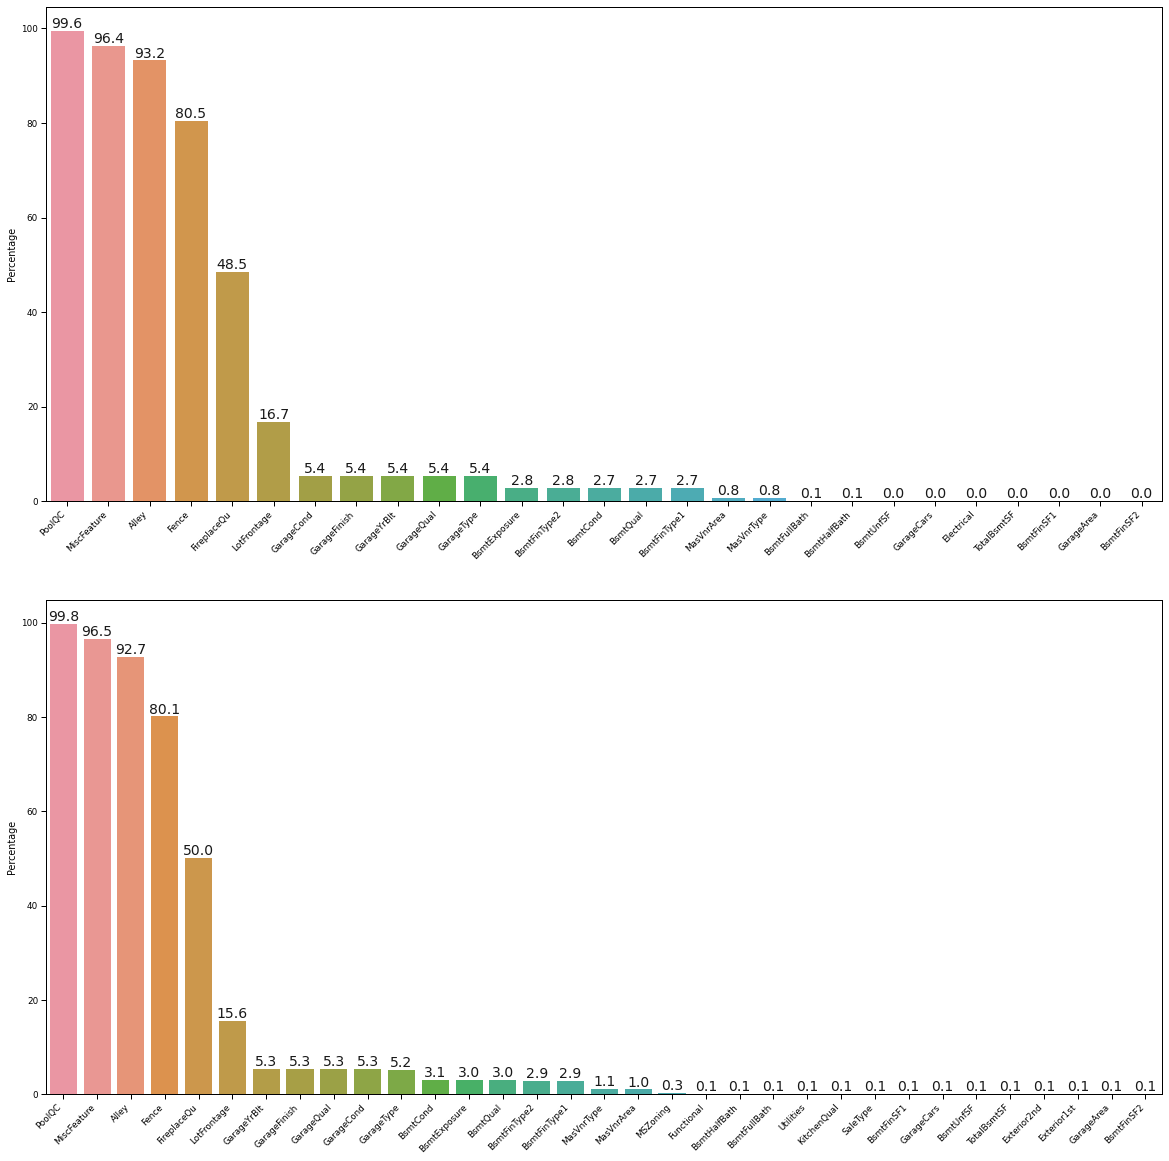

In [26]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=miss_train_plot.index, y='Percentage', data=miss_train_plot)
showvalues(ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=miss_test_plot.index, y='Percentage', data=miss_test_plot)
showvalues(ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [27]:
len(df_combined_train.select_dtypes(include=['int64','float64']).columns)

37

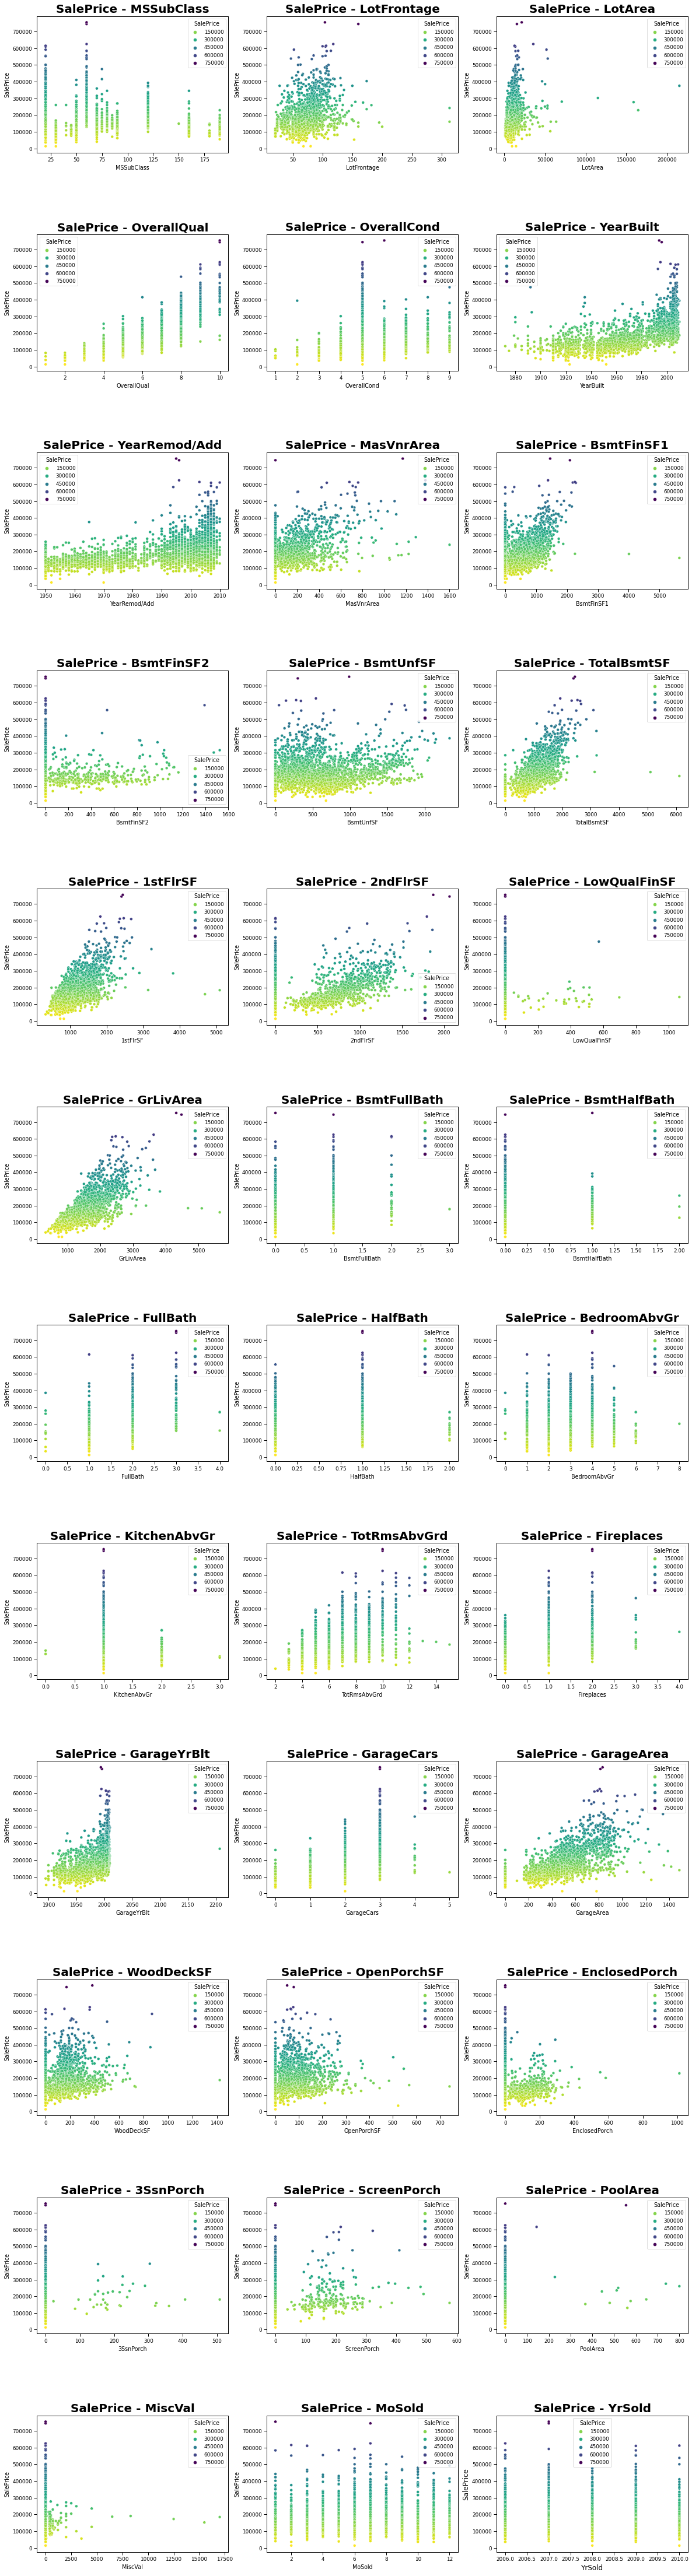

In [28]:
# Visualising numerical predictor variables with Target Variables, and this as well can be used for univariate distributions as well
# df_num_train = df_numerical_train[[col for col in df_numerical_train.columns if col != 'MS SubClass']]
fig,axs= plt.subplots(12,3,figsize=(20, 80))

# adjust horizontal space between plots 
fig.subplots_adjust(hspace=0.6)

# We need to flatten the axes for iterating over them. Here the axes in the dimension [12, 3] is transformed to a vector consisting of 12*3 = 36 values.
for i,ax in zip(df_numerical_train.columns, axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_numerical_train, ax=ax, palette='viridis_r')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)

    # ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),fontweight='bold',size=20)

**Observations**:
1. We can observe that the range of house prices is on the higher side with increase in overall quality - 'OverallQual'. Hence the feature is one of the potential indicators that affects the house prices 
2. Houses having average overall condition have surprisingly higher sale prices
3. Houses built in recent years have higher prices
4. Houses with greater Masonry Veneer Area have some houses with prices in upper ranges
5. There is more demand for houses that have just a single kitchen at the first floor 

**Justifications for not using KNN**
1. KNN algorithm works best for classification where there is a clear demarcation of feature values and corresponding labels as clusters
2. The number of unique target values is large enough and non-existence of a large number of training samples make it too difficult for the algorithm to segregate target lables and interpolate the same on test data

**Justification for not using SVR and Kernel SVR**
1. SVR is best utilized for estimating values where the  no. of dimensions >= no. of training samples. In short, it is favoured for smaller datasets
2. The decision boundary can't be estimated easily due to the lack of a particular progression pattern between the feature and the target variable

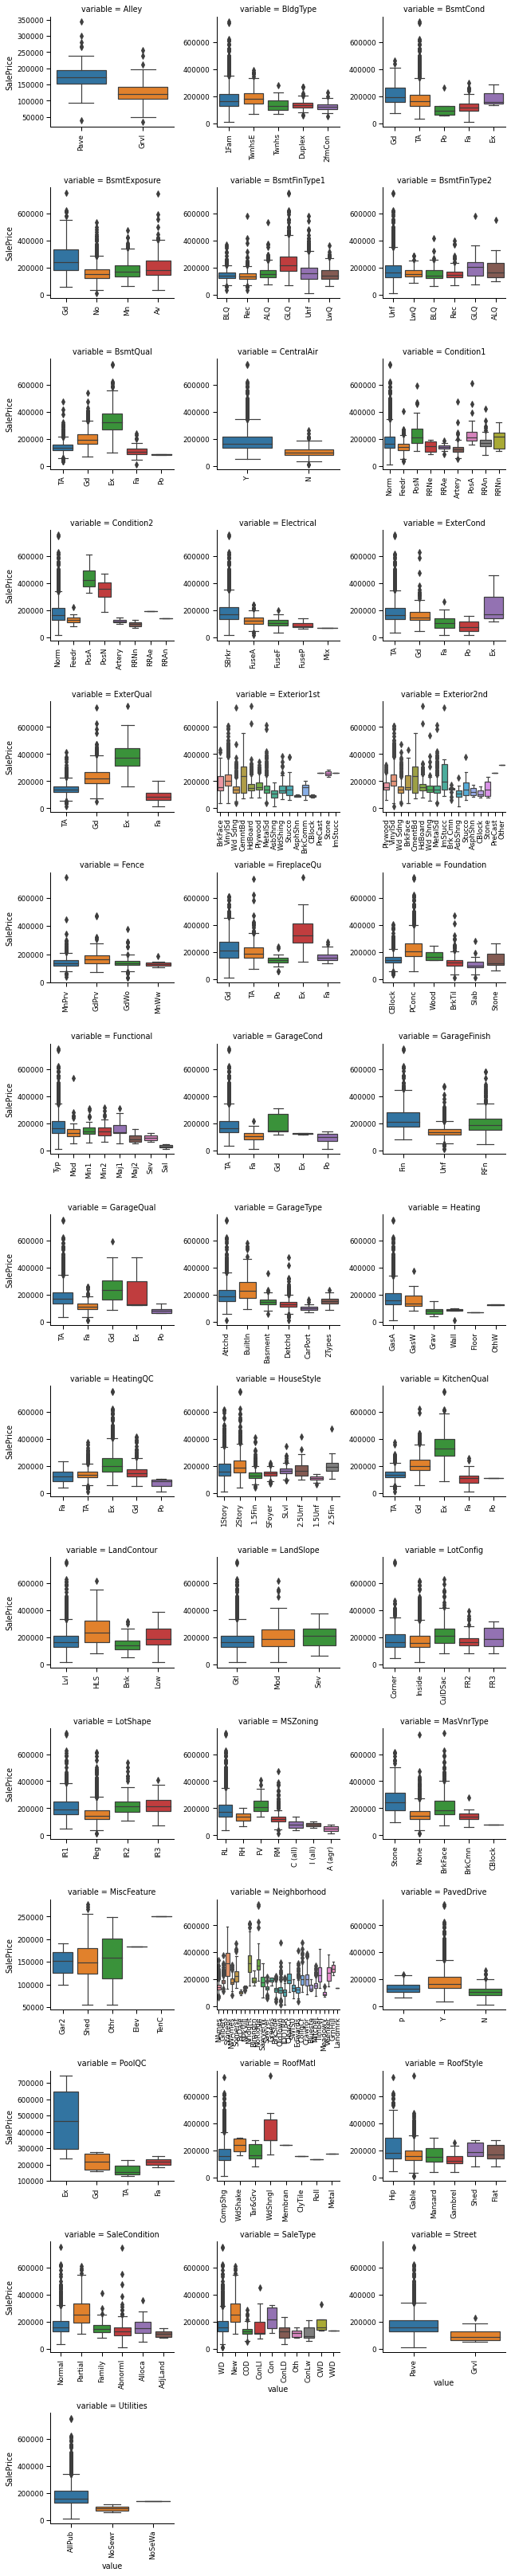

In [29]:
# Visualizing categorical predictors with target variable
def facetgrid_boxplot(x, y, **kwargs):
  sns.boxplot(x=x, y=y)
  x = plt.xticks(rotation=90)

# pd.melt is a useful function. You have written its functionality in your notebook.
f = pd.melt(df_combined_train, id_vars=['SalePrice'], value_vars=sorted(df_categorical_train.columns))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)

# Mapping onto the function where it will plot the boxplot
g = g.map(facetgrid_boxplot, 'value', 'SalePrice')

In [30]:
# Visualize the distribution of dataframe 'f'
f.head(10)

,SalePrice,variable,value
0,215000,Alley,NaN
1,105000,Alley,NaN
2,172000,Alley,NaN
3,244000,Alley,NaN
4,189900,Alley,NaN
5,195500,Alley,NaN
6,213500,Alley,NaN
7,191500,Alley,NaN
8,236500,Alley,NaN
9,189000,Alley,NaN


***SalePrice isn't normally distributed. It has a right skewed distribution.***

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

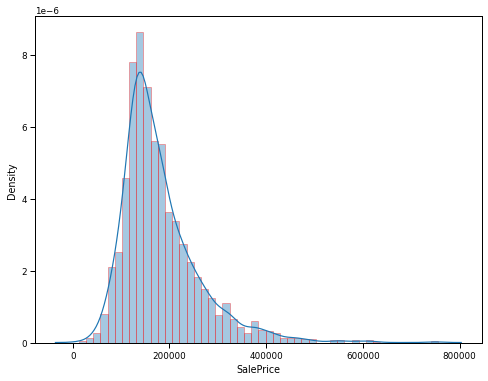

In [31]:
# Distribution of Target variable (SalePrice)
plt.figure(figsize=(8,6))
sns.distplot(df_combined_train['SalePrice'],hist_kws={"edgecolor": (1,0,0,1)})

In [32]:
# Skew and kurtosis for SalePrice 
print("Skewness: %f" % df_combined_train['SalePrice'].skew())
print("Kurtosis: %f" % df_combined_train['SalePrice'].kurt())

# Hence, the skewness AND kurtosis have naturally declined by a bit on increasing the number of training instances

Skewness: 1.743500
Kurtosis: 5.118900


In [33]:
# Applying log transformation to remove skewness and make target variable normally distributed(we apply natural log here)
# Create a copy of training AND test datasets to apply transformations
df_train_copy = df_combined_train.copy()
y = df_combined_train['SalePrice']
df_test_copy = df_test.copy()

# Don't just copy the column names as the order is different 
# df_test_copy.columns = df_train_copy.columns

df_train_copy['SalePrice'] = np.log1p(df_combined_train['SalePrice'])

In [34]:
# Reset the index for test data
# df_test_copy.set_index('Id', inplace=True)
# df_test_copy.index.name = None

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

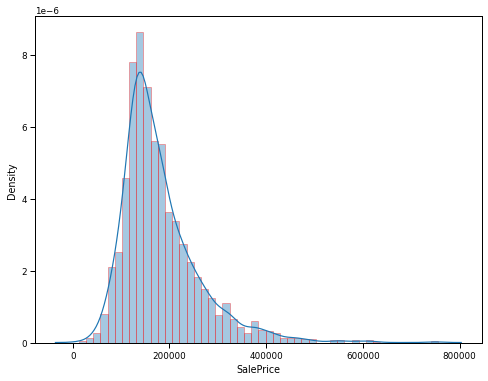

In [35]:
# Distribution of Target variable (SalePrice) - again to see if the skewness has decreased 
plt.figure(figsize=(8,6))

# hist_kws parameter refers to edgecolour of bins in histogram
sns.distplot(df_combined_train['SalePrice'], hist_kws={"edgecolor": (1,0,0,1)})

In [36]:
# Again calculate the skewness and kurtosis
print("Skewness: " + str(df_train_copy['SalePrice'].skew()))
print("Kurtosis: " + str(df_train_copy['SalePrice'].kurtosis()))

Skewness: -0.014772659537224368
Kurtosis: 1.5138180928006526


***As we can observe, the skewness and kurtosis values after the requisite transformations have minimied and the distribution is almost normal***

<Figure size 2160x1440 with 0 Axes>

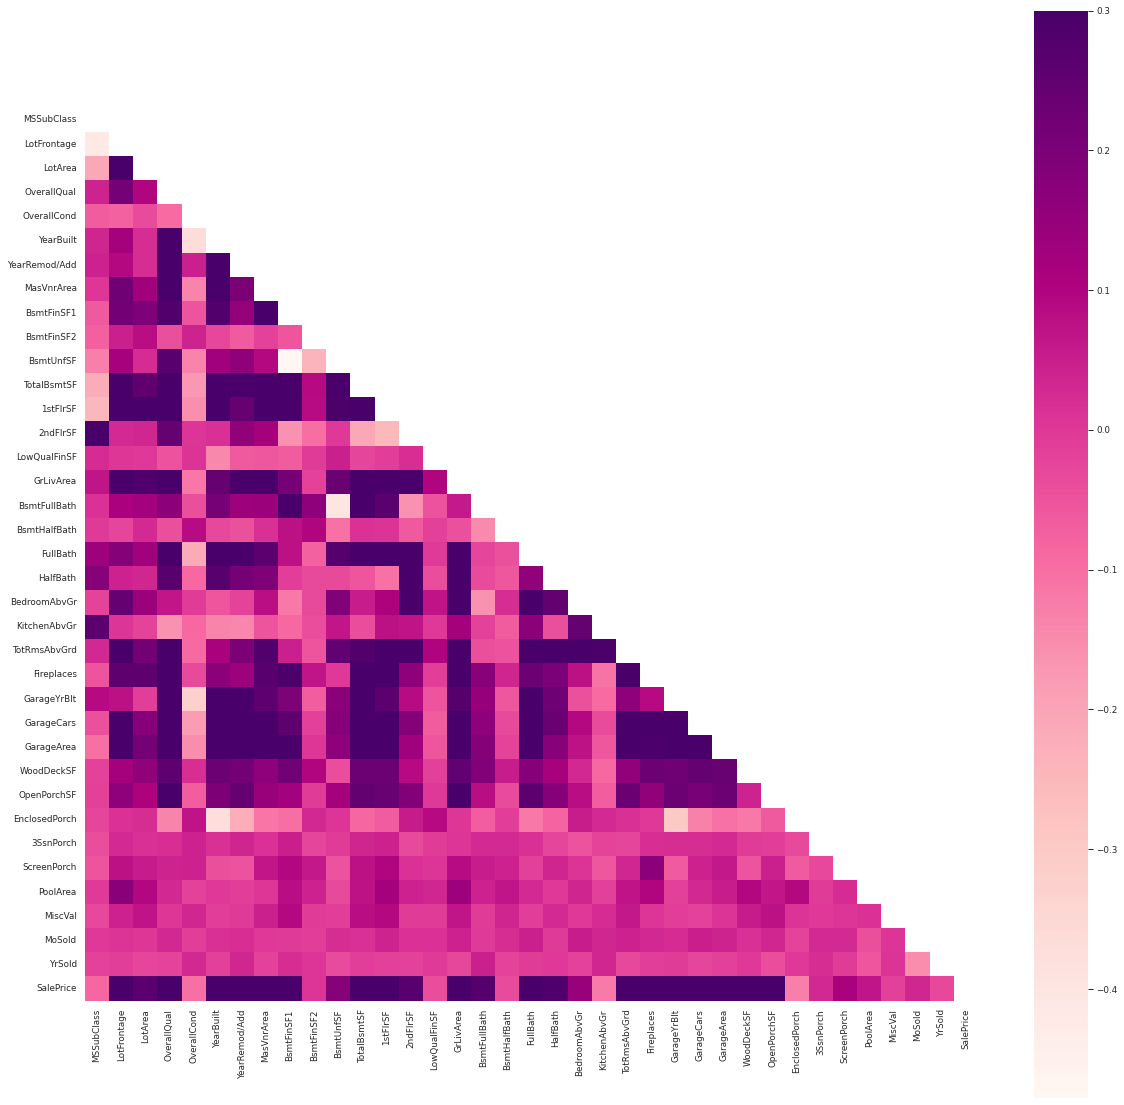

In [37]:
# Plotting the Pearsson's correlation heatmap between the numerical features
# The code has been derived from Seaborn API docs.
plt.figure(figsize=(30, 20))
corr = df_numerical_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='RdPu')

Hence we can see there is a high degree of multicollinearity in the dataset. We can either drop them by performing certain feature selection techniques or let some regularization ML techniques(such as Lasso and Ridge regression), do the needful.

**We will perform some advanced Feature Engineering techniques such as(if required):**
1. Outlier Detection and removal(for extremely skewed distributions of features)
2. Missing Value Imputation
3. Scaling and Normalization(if required)





In [38]:
# Visualization of categorical variables
# cat_cols = [col for col in df_train_copy.columns if df_train_copy[col].dtype=='object']
# df_cat_subset = df_train_copy[cat_cols]
df_categorical_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [39]:
# Counting VALUE COUNTS for categorical columns
for col in df_categorical_train.columns:
    print(str(col) + "-"*len(str(col)) + str(df_categorical_train[col].value_counts()))
    print()

MSZoning--------RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MSZoning, dtype: int64

Street------Pave    2918
Grvl      12
Name: Street, dtype: int64

Alley-----Grvl    120
Pave     78
Name: Alley, dtype: int64

LotShape--------Reg    1859
IR1     979
IR2      76
IR3      16
Name: LotShape, dtype: int64

LandContour-----------Lvl    2633
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

Utilities---------AllPub    2927
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig---------Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: LotConfig, dtype: int64

LandSlope---------Gtl    2789
Mod     125
Sev      16
Name: LandSlope, dtype: int64

Neighborhood------------NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfo

In [40]:
# Drop 'Utilities' and 'Pave' columns as it has extremely low cardinality, and possibly, the model cannot learn much from it 
# df_train_copy.drop(['Street', 'Utilities'], axis=1, inplace=True)
# We will decide upon the other features later 

In [41]:
# Numerical columns 
# For the time being, as the percentage of missing values is extremely large for four features, namely ['PoolQc', 'MiscFeature', 'Alley' AND 'Fence'], we would drop them from training and test datasets
# If appropriate information regarding these columns arrives, we would impute them accordingly 
# drop_features = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
# df_train_copy.drop(drop_features, axis=1, inplace=True)
# df_test_copy.drop(drop_features, axis=1, inplace=True)

In [42]:
# Let's separate out the target variable 
df_train_copy = df_train_copy.drop(['SalePrice'], axis = 1)

In [43]:
# quantile75 = df_train_copy['GrLivArea'].quantile(0.75)
# quantile25 = df_train_copy['GrLivArea'].quantile(0.25)
# IQR = quantile75 - quantile25
# IQR
# print(IQR)
# print()

# fig, (ax1, ax2) = plt.subplots(2, 1)
# plt.subplots_adjust(top=1.5, bottom=0.5, wspace=1)
# fig.figsize=[50, 15]

# Plot the BOXPLOT for this feature 
# df_train_copy['GrLivArea'].plot(kind='box', ax=ax1) 


# Plot the KDEplot for this feature
# df_train_copy['GrLivArea'].plot(kind='kde', ax=ax2)
# ax2.set_xlabel('GrLivArea')
# print()

# Print Skewness
# print(df_train_copy['GrLivArea'].skew())

In [44]:
# Count the number of values in GrLivArea > 3000
# print(df_train_copy[df_train_copy['GrLivArea']>3000].shape)

# Since there are only 18 of them, let's cap them altogether with 3000

In [45]:
# Here we would cap the outliers above , as they contribute to the data skewness
# extreme_upper = df_train_copy['GrLivArea'].quantile(0.75) + 3 * IQR
# df_train_copy['GrLivArea'] = np.where(df_train_copy['GrLivArea'] > extreme_upper, extreme_upper, df_train_copy['GrLivArea'])
# df_train_copy['GrLivArea'] = np.where(df_train_copy['GrLivArea']>3000, 3000, df_train_copy['GrLivArea'])

# Again plotting KDE plot 
# df_train_copy['GrLivArea'].plot(kind='kde')
# print(df_train_copy['GrLivArea'].skew())

***Hence we have created an approximate normal distribution***

In [46]:
# Let's replace the outliers in upper part of feature set with 75th quantile values
# df_train_copy.loc[df_train_copy['GrLivArea']>=4500, 'GrLivArea'] = quantile25
# Or you can also choose to drop these outlier values from dataframe


In [47]:
# df_train_copy['GrLivArea'].plot.hist()

In [48]:
# df_train_copy['age']=df_train_copy['YrSold']-df_train_copy['YearBuilt']

# See why its been done like this
# Some of the non-numeric predictors are stored as numbers; convert them into strings will convert those columns into dummy variables later.
# df_train_copy['MSSubClass'] = df_train_copy['MSSubClass'].astype(str) 
# df_train_copy['YrSold'] = df_train_copy['YrSold'].astype(str) #year
# df_train_copy['MoSold'] = df_train_copy['MoSold'].astype(str) #month

In [49]:
# According to the description, this column refers to the Linear Street of feet. We can't impute using 0. Let's try with 'mean' or 'median' first 
df_train_copy['LotFrontage_median'] = df_train_copy['LotFrontage'].fillna(df_train_copy['LotFrontage'].dropna().median())


# Since we have access to test data, we would impute with values from test data. Else impute with values from training data
df_test_copy['LotFrontage_median'] = df_test_copy['LotFrontage'].fillna(df_test_copy['LotFrontage'].dropna().median())

# Let's study the KDE distribution of this feature 
# df_train_copy['LotFrontage_median'].plot(kind='kde')

# Printing the skewness and krutosis of this distribution 
# print(df_train_copy['LotFrontage_median'].skew())
# print(df_train_copy['LotFrontage_median'].kurtosis())

12.940785666242295


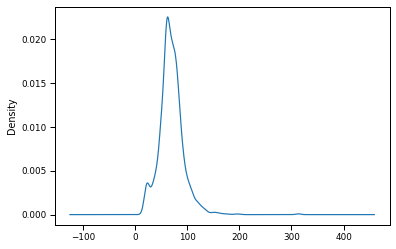

In [50]:
# Let's fill it using random imputation function
df_train_copy['LotFrontage_fill'] = df_train_copy['LotFrontage']
random_sample = df_train_copy['LotFrontage'].dropna().sample(df_train_copy['LotFrontage'].isnull().sum(), random_state=seed_value)
random_sample.index = df_train_copy[df_train_copy['LotFrontage'].isnull()].index
df_train_copy.loc[df_train_copy['LotFrontage_fill'].isnull(), 'LotFrontage_fill'] = random_sample

# Perform the same on test data
df_test_copy['LotFrontage_fill'] = df_test_copy['LotFrontage']
random_sample = df_test_copy['LotFrontage'].dropna().sample(df_test_copy['LotFrontage'].isnull().sum(), random_state=seed_value)
random_sample.index = df_test_copy[df_test_copy['LotFrontage'].isnull()].index
df_test_copy.loc[df_test_copy['LotFrontage_fill'].isnull(), 'LotFrontage_fill'] = random_sample

# Let's study the KDE plot for this variable 
df_train_copy['LotFrontage_fill'].round(0).plot(kind='kde')

# Again study kurtosis
print(df_train_copy['LotFrontage_fill'].round(0).kurtosis())

<AxesSubplot:ylabel='Density'>

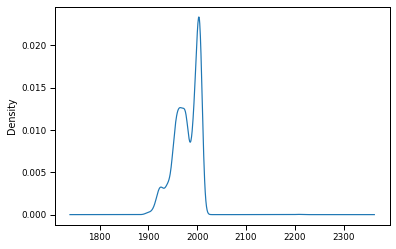

In [51]:
# Studying GarageYr. Belt
df_train_copy['GarageYrBlt'].plot(kind='kde')

# Missing Value Imputation + Encoding Categorical Variables 

In [52]:
# Again define numerical and categorical columns as per the new dataset 
num_cols = [col for col in df_train_copy.columns if df_train_copy[col].dtype != 'object']
cat_cols = [col for col in df_train_copy.columns if col not in num_cols]

In [53]:
# Functional: Home functionality (Assume typical unless deductions are warranted)
df_train_copy['Functional'] = df_train_copy['Functional'].fillna('Typ')
df_test_copy['Functional'] = df_test_copy['Functional'].fillna('Typ')

df_train_copy['Electrical'] = df_train_copy['Electrical'].fillna('SBrkr') #Filling with modef
df_test_copy['Electrical'] = df_test_copy['Electrical'].fillna('SBrkr')

# data description states that NA refers to "No Pool"
df_train_copy['PoolQC'] = df_train_copy['PoolQC'].fillna('Missing')
df_test_copy['PoolQC'] = df_test_copy['PoolQC'].fillna('Missing')

# Replacing the missing values with 0, since no garage = no cars in garage inferred from data dictionary
df_train_copy['GarageYrBlt'] = df_train_copy['GarageYrBlt'].fillna(0)
df_test_copy['GarageYrBlt'] = df_test_copy['GarageYrBlt'].fillna(0)

# Filling missing values in KitchenQuality with 'TA', meaning average  
df_train_copy['KitchenQual'] = df_train_copy['KitchenQual'].fillna('TA')
df_test_copy['KitchenQual'] = df_test_copy['KitchenQual'].fillna('TA')

# Filling missing values with mode
df_train_copy['Exterior1st'] = df_train_copy['Exterior1st'].fillna(df_train_copy['Exterior1st'].mode()[0])
df_test_copy['Exterior1st'] = df_test_copy['Exterior1st'].fillna(df_test_copy['Exterior1st'].mode()[0])

df_train_copy['Exterior2nd'] = df_train_copy['Exterior2nd'].fillna(df_train_copy['Exterior2nd'].mode()[0])
df_test_copy['Exterior2nd'] = df_test_copy['Exterior2nd'].fillna(df_test_copy['Exterior2nd'].mode()[0])

df_train_copy['SaleType'] = df_train_copy['SaleType'].fillna(df_train_copy['SaleType'].mode()[0])
df_test_copy['SaleType'] = df_test_copy['SaleType'].fillna(df_test_copy['SaleType'].mode()[0])

# None means no Garage
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
     df_train_copy[col] = df_train_copy[col].fillna('Missing')
     df_test_copy[col] = df_test_copy[col].fillna('Missing')

# None means no Basement        
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    df_train_copy[col] = df_train_copy[col].fillna('Missing')
    df_test_copy[col] = df_test_copy[col].fillna('Missing')

df_train_copy['MSZoning'] = df_train_copy.groupby('MSSubClass')['MSZoning'].transform(lambda x : x.fillna(x.mode()[0]))
df_test_copy['MSZoning'] = df_test_copy.groupby('MSSubClass')['MSZoning'].transform(lambda x : x.fillna(x.mode()[0]))
# The pandas update function is used to 'Modify in place using non-NA values from another DataFrame. Aligns on indices. There is no return value.'
# All of the above is stated according to documentation.

# df_train_copy[cat_cols].update(df_train_copy[cat_cols].fillna("Missing"))
# df_train_copy[num_cols].update(df_train_copy[num_cols].fillna(0))
# df_test_copy[num_cols].fillna("Missing", inplace=True)

# Update Missing LotFrontage values with 0
df_train_copy['LotFrontage'] = df_train_copy['LotFrontage'].fillna(0)
df_test_copy['LotFrontage'] = df_test_copy['LotFrontage'].fillna(0)


# Update Missing 'Fireplace QA' wirh 'NA' feature
df_train_copy['FireplaceQu'] = df_train_copy['FireplaceQu'].fillna('NA')
df_test_copy['FireplaceQu'] = df_test_copy['FireplaceQu'].fillna('NA')


# Updating 'MasVnrType'(None) and 'MasVnrArea'(0)
df_train_copy['MasVnrType'] = df_train_copy['MasVnrType'].fillna('None')
df_test_copy['MasVnrType'] = df_test_copy['MasVnrType'].fillna('None')

df_train_copy['MasVnrArea'] = df_train_copy['MasVnrArea'].fillna(0)
df_test_copy['MasVnrArea'] = df_test_copy['MasVnrArea'].fillna(0)


# Update 'Utilities' column
for col in ['Utilities', 'Exterior2nd']:
    df_train_copy[col] = df_train_copy[col].fillna('Missing')
    df_test_copy[col] = df_test_copy[col].fillna('Missing')
    
# Fill in missing values 
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    df_train_copy[col] = df_train_copy[col].fillna(0)
    df_test_copy[col] = df_test_copy[col].fillna(0)

# Drop ['Alley', 'Fence' and 'MiscFeature']
df_train_copy.drop(['Alley', 'Fence', 'MiscFeature'], axis=1, inplace=True)
df_test_copy.drop(['Alley', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [54]:
# Finally IMPUTE some more randomly missing values with 0
df_train_copy['BsmtFinSF1'] = df_train_copy['BsmtFinSF1'].fillna(0)
df_test_copy['BsmtFinSF1'] = df_test_copy['BsmtFinSF1'].fillna(0)

df_train_copy['BsmtFinSF2'] = df_train_copy['BsmtFinSF2'].fillna(0)
df_test_copy['BsmtFinSF2'] = df_test_copy['BsmtFinSF2'].fillna(0)

df_train_copy['BsmtUnfSF'] = df_train_copy['BsmtUnfSF'].fillna(0)
df_test_copy['BsmtUnfSF'] = df_test_copy['BsmtUnfSF'].fillna(0)

df_train_copy['TotalBsmtSF'] = df_train_copy['TotalBsmtSF'].fillna(0)
df_train_copy['TotalBsmtSF'] = df_train_copy['TotalBsmtSF'].fillna(0)

df_train_copy['GarageCars'] = df_train_copy['GarageCars'].fillna(0)
df_test_copy['GarageCars'] = df_test_copy['GarageCars'].fillna(0)

df_train_copy['GarageArea'] = df_train_copy['GarageCars'].fillna(0)
df_test_copy['GarageArea'] = df_test_copy['GarageArea'].fillna(0)

***Imputing Categorical Features***

In [55]:
# Use these imputations later on if required. Use these features, add them to the model else use them in conjunction for feature aggregation
df_train_copy['PoolArea'+'_impute'] = df_train_copy['PoolArea'].apply(lambda x : 1 if x==0 else 0)
df_train_copy['MiscVal'+'_impute'] = df_train_copy['MiscVal'].apply(lambda x : 1 if x==0 else 0)
df_train_copy['ScreenPorch'+'_impute'] = df_train_copy['ScreenPorch'].apply(lambda x : 1 if x==0 else 0)
df_train_copy['3SsnPorch'+'_impute'] = df_train_copy['3SsnPorch'].apply(lambda x : 1 if x==0 else 0)
df_train_copy['EnclosedPorch'+'_impute'] = df_train_copy['EnclosedPorch'].apply(lambda x : 1 if x==0 else 0)
df_train_copy['WoodDeckSF'+'_impute'] = df_train_copy['WoodDeckSF'].apply(lambda x : 1 if x>0 else 0)
df_train_copy['OpenPorchSF'+'_impute'] = df_train_copy['OpenPorchSF'].apply(lambda x : 1 if x>0 else 0)
df_train_copy['HalfBath'+'_impute'] = df_train_copy['HalfBath'].apply(lambda x : 1 if x==0 else 0)
df_train_copy['Fireplaces'+'_impute'] = df_train_copy['Fireplaces'].apply(lambda x : 1 if x==0 else 0)
df_train_copy['Fireplaces'+'_impute'] = df_train_copy['Fireplaces'].apply(lambda x : 1 if x>0 else 0)
df_train_copy['2ndFlrSF'+'_impute'] = df_train_copy['2ndFlrSF'].apply(lambda x : 1 if x==0 else 0)
df_train_copy['LowQualFinSF'+'_impute'] = df_train_copy['LowQualFinSF'].apply(lambda x : 1 if x==0 else 0)

# Follow the same procedure for test columns 
df_test_copy['PoolArea'+'_impute'] = df_test_copy['PoolArea'].apply(lambda x : 1 if x==0 else 0)
df_test_copy['MiscVal'+'_impute'] = df_test_copy['MiscVal'].apply(lambda x : 1 if x==0 else 0)
df_test_copy['ScreenPorch'+'_impute'] = df_test_copy['ScreenPorch'].apply(lambda x : 1 if x==0 else 0)
df_test_copy['3SsnPorch'+'_impute'] = df_test_copy['3SsnPorch'].apply(lambda x : 1 if x==0 else 0)
df_test_copy['EnclosedPorch'+'_impute'] = df_test_copy['EnclosedPorch'].apply(lambda x : 1 if x==0 else 0)
df_test_copy['WoodDeckSF'+'_impute'] = df_test_copy['WoodDeckSF'].apply(lambda x : 1 if x>0 else 0)
df_test_copy['OpenPorchSF'+'_impute'] = df_test_copy['OpenPorchSF'].apply(lambda x : 1 if x>0 else 0)
df_test_copy['HalfBath'+'_impute'] = df_test_copy['HalfBath'].apply(lambda x : 1 if x==0 else 0)
df_test_copy['Fireplaces'+'_impute'] = df_test_copy['Fireplaces'].apply(lambda x : 1 if x==0 else 0)
df_test_copy['Fireplaces'+'_impute'] = df_test_copy['Fireplaces'].apply(lambda x : 1 if x>0 else 0)
df_test_copy['2ndFlrSF'+'_impute'] = df_test_copy['2ndFlrSF'].apply(lambda x : 1 if x==0 else 0)
df_test_copy['LowQualFinSF'+'_impute'] = df_test_copy['LowQualFinSF'].apply(lambda x : 1 if x==0 else 0)

***AWARE***
1. The columns have been randomly imputed based on the count of specific features in the dataset. This method is a very simple version to compute missing values which gives importance to 'Missing' values if there is a significant count of this variable, else rest of the features are given equal weighatge and encoded as '1'
2. Here the missing values are not at random(MNAR)


In [56]:
num_cols_1 = [col for col in df_train_copy.columns if df_train_copy[col].dtype!='object' and col!='SalePrice']
cat_cols_1 = [col for col in df_train_copy.columns if col not in num_cols_1 and col!='SalePrice']
num_cols_1.remove('YearRemod/Add')

In [57]:
# We have already removed skewness from target variable, we need to check out the skewness among various features too
# df_train_copy_num = df_train_copy.select_dtypes(['int64', 'float64'])
# skew_features = df_train_copy_num.apply(lambda x : x.skew()).sort_values(ascending=False)

# skew_high = skew_features[skew_features > 0.6] 
# This command returns a series

# high_indices = skew_high.index
# This returns a list of indices

In [58]:
# Refer this for boxplot(numerical value distribution)
# fig, ax = plt.subplots(figsize=(8, 7))
# ax.set_xscale("log")
# ax = sns.boxplot(data=df_train_copy_num , orient="h", palette="Set1")
# ax.xaxis.grid(False)
# ax.set(ylabel="FeatureNames")
# ax.set(xlabel="Numeric values")
# ax.set(title="Numeric Distribution of Features")
# sns.despine(trim=True, left=True)

In [59]:
# Normalize skewed features using a box-cox normal distribution, we can surely use other techniques but it works very well on this dataset
# Check out for other techniques used to normalize skewed features(sum of them being)
# People usually use box-cox and StandardScaler for removing skewed data
# for i in high_indices:
      # What's this 1.002 used for?
#     df_train_copy[i] = boxcox1p(df_train_copy[i], boxcox_normmax(df_train_copy[i] + 1.002))

In [60]:
# Creating more features by log transformation
# Refer this for boxplot(numerical value distribution)
# fig, ax = plt.subplots(figsize=(8, 7))
# ax.set_xscale("log")
# ax = sns.boxplot(data=df_train_copy_num[high_indices] , orient="h", palette="Set1")
# ax.xaxis.grid(False)
# ax.set(ylabel="Feature Names")
# ax.set(xlabel="Numeric values")
# ax.set(title="Numeric Distribution of Features")
# sns.despine(trim=True, left=True)

In [61]:
# from scipy import stats
# high_indices_list = list(high_indices)

In [62]:
# nrows = 11
# ncols = 2

# fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15))

# #Initializing lazy counter
# count = 0

# for i in range(nrows):
#   for j in range(ncols):
#       ax = axes[i, j]

#       if count < len(high_indices.tolist()):
#         ax.plot(df_train_copy[high_indices_list[count]])
#         ax.set(xlabel="Feature Names")
#         ax.title("Skewness distribution of a feature variable")

In [63]:
# NOt useful columns in our predictions, more than 99% rows have same value.
# print(df_train_copy['Utilities'].value_counts())
# NOt useful columns in our predictions, more than 99% rows have same value.
# print(df_train_copy['Street'].value_counts())
# NOt useful columns in our predictions, more than 99% rows have same value.
# print(df_train_copy['PoolQC'].value_counts())

In [64]:
# As we can see above, those columns have very little other useful data as their values and are primarily composed of a single feature. It would be better 
# if we drop them as they are adding up as a redundant feature without giving much insights about the data.
# df_train_copy = df_train_copy.drop(['Utilities', 'Street', 'PoolQC'], axis=1)
# df_test_copy = df_test_copy.drop(['Utilities', 'Street', 'PoolQC'], axis=1)

In [65]:
#The main difference between apply and transform functions is that while apply passes the dataframe in the form of columns to the custom function, 
#whereas the transform method passes the dataframe as a series to the custom function.
#Let's check out the number of 0's in dataset
# for col in numerical_cols:
#   print(col, "\t", len(list(df_train_copy.loc[df_train_copy[col] == 0, col].index)))
#Hence we can observe there are many columns containing 0 as a value
#We need some way to remove their unusefulness as they may be useful

In [66]:
# df_train_copy['TotalBsmtSF'].value_counts()

In [67]:
# Understand this feature descriptor later on. Right now focus on features that are in use 
# df_train_copy['TotalBsmtSF'] = df_train_copy['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
# df_train_copy['2ndFlrSF'] = df_train_copy['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
# df_train_copy['LotFrontage'] = df_train_copy['LotFrontage'].apply(lambda x: np.exp(4.2) if x <= 0.0 else x)
# df_train_copy['MasVnrArea'] = df_train_copy['MasVnrArea'].apply(lambda x: np.exp(4) if x <= 0.0 else x)
# df_train_copy['BsmtFinSF1'] = df_train_copy['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)

In [68]:
# Creating more features by log transformation
# def log_transform(result, features):
#   m = result.shape[1]

#   for feature in features:
    
#     # The Pandas assign function assigns a new column to the dataframe with a modified feature. Look up the docs for further information.
#     result = result.assign(newcol = pd.Series(np.log(1.01+result[feature])))
#     # columns.values returns a numpy array
#     result.columns.values[m] = feature + '_log' 
#     m += 1

#   return result

# log_features = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
#                  'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
#                  'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
#                  'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
#                  'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearRemodAdd']

# df_train_copy = log_transform(df_train_copy, log_features)

Now that every possible transformation of data has been taken care of, let's one-hot encode our categorical variables. That's as easy as it sounds.

In [69]:
# df_train_copy_num = df_train_copy.select_dtypes(include=['int64', 'float64'])
# df_train_copy_cat = df_train_copy.select_dtypes(exclude=['int64', 'float64'])

# df_train_copy_cat = pd.get_dummies(df_train_copy_cat, drop_first=True)

# df_train_copy_final = pd.concat([df_train_copy_num, df_train_copy_cat], axis=1)
# remove_cols = ['LotFrontage_median', 'PoolArea_impute', 'MiscVal_impute', 'ScreenPorch_impute', '3SsnPorch_impute', 'EnclosedPorch_impute', 'WoodDeckSF_impute', 'OpenPorchSF_impute', 'OpenPorchSF_impute', 
#            'HalfBath_impute', 'Fireplaces_impute', 'Fireplaces_impute', '2ndFlrSF_impute', 'LowQualFinSF_impute']

In [70]:
# Remove 'SalePrice' from train set features
# y = df_origin['SalePrice']
# num_cols_1_train.remove('SalePrice')
train_data = df_train_copy[num_cols_1]
test_data = df_test_copy[num_cols_1]

# Feature Selection

In [71]:
# Remove FEATURES using Variance Threshold. Drop colums whose variability in values is less, that is, one feature dominates more than others. 
# This can lead to overfitting and hence, these columns must be dropped 
var_threshold = VarianceThreshold(threshold=0.2)
var_threshold.fit_transform(train_data)

var_threshold.get_support()
# len(train_data.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True,  True, False])

In [72]:
less_variance_columns = [col for col in train_data.columns if col not in train_data.columns[var_threshold.get_support()]]
train_data.drop(less_variance_columns, axis=1, inplace=True)
test_data.drop(less_variance_columns, axis=1, inplace=True)

In [73]:
# Plot the correlation matrix
# Remove 'Id' column from numerical columns 
# numerical_cols.remove('Order')
corr_matrix = train_data.corr()


def highlight_cells(val):
    color = 'yellow' if val >= 0.8 and val != 1 else ' '
    return 'background-color: {}'.format(color)

corr_matrix.style.applymap(highlight_cells)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage_median,LotFrontage_fill,WoodDeckSF_impute,OpenPorchSF_impute,HalfBath_impute,Fireplaces_impute,2ndFlrSF_impute
MSSubClass,1.000000,-0.233959,-0.204613,0.039419,-0.067349,0.036579,0.003634,-0.059767,-0.070847,-0.129987,-0.218489,-0.247828,0.304237,0.025765,0.068061,0.014187,0.134631,0.175879,-0.019208,0.031898,-0.049955,-0.103184,-0.046074,-0.046074,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.391497,-0.351931,0.022646,0.025357,-0.173600,-0.036045,-0.363018
LotFrontage,-0.233959,1.000000,0.136862,0.128840,-0.034675,0.026130,0.109858,0.067034,-0.005254,0.139290,0.206080,0.241707,-0.002813,0.019315,0.186767,0.019554,0.082826,-0.029367,0.112718,0.200488,0.051240,0.014302,0.142774,0.142774,0.001162,0.085480,0.024824,0.004061,0.045789,0.109439,0.003098,0.017357,-0.011737,0.652859,0.561157,0.001173,0.054375,0.027763,0.048222,0.047625
LotArea,-0.204613,0.136862,1.000000,0.097188,-0.034759,0.023258,0.125950,0.191692,0.083198,0.023883,0.253765,0.332235,0.032996,0.000812,0.285599,0.124208,0.127433,0.035497,0.136569,0.216597,0.256989,0.073049,0.179456,0.179456,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.362758,0.332588,0.057440,0.055757,-0.035815,0.181228,0.022605
OverallQual,0.039419,0.128840,0.097188,1.000000,-0.094812,0.597027,0.423089,0.284458,-0.041122,0.270527,0.547766,0.477837,0.241402,-0.048680,0.570556,0.168373,0.522263,0.268853,0.063291,0.380693,0.393007,0.278562,0.599547,0.599547,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.198917,0.172864,0.300622,0.451072,-0.281881,0.437057,-0.120894
OverallCond,-0.067349,-0.034675,-0.034759,-0.094812,1.000000,-0.368773,-0.132472,-0.051341,0.040992,-0.137303,-0.174179,-0.157052,0.006218,0.009175,-0.115643,-0.043458,-0.214316,-0.088127,-0.006137,-0.089816,-0.031702,0.014995,-0.181697,-0.181697,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.067140,-0.066183,-0.034824,-0.160665,0.084001,-0.062193,-0.053357
YearBuilt,0.036579,0.026130,0.023258,0.597027,-0.368773,1.000000,0.306797,0.280069,-0.027328,0.129311,0.407764,0.310463,0.016828,-0.144282,0.241726,0.212119,0.469406,0.269268,-0.055093,0.111919,0.170672,0.260257,0.537982,0.537982,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.114341,0.106019,0.313481,0.424403,-0.278252,0.240402,0.109468
MasVnrArea,0.003634,0.109858,0.125950,0.423089,-0.132472,0.306797,1.000000,0.299951,-0.014955,0.089662,0.393530,0.392280,0.120159,-0.057173,0.400703,0.139684,0.254471,0.188703,0.080590,0.278418,0.270051,0.128084,0.356831,0.356831,0.165875,0.140003,-0.109915,0.014222,0.066817,0.004893,0.045276,-0.002358,-0.016876,0.201685,0.186909,0.131852,0.183111,-0.190694,0.272556,-0.018722
BsmtFinSF1,-0.059767,0.067034,0.191692,0.284458,-0.051341,0.280069,0.299951,1.000000,-0.054022,-0.477244,0.536731,0.457586,-0.163710,-0.066129,0.209944,0.640212,0.078086,-0.008205,-0.118575,0.048118,0.296098,0.125831,0.255311,0.255311,0.224199,0.125150,-0.100318,0.050567,0.095952,0.084147,0.092900,-0.000884,0.022341,0.197740,0.187222,0.185039,0.115164,0.008605,0.238515,0.235461
BsmtFinSF2,-0.070847,-0.005254,0.083198,-0.041122,0.040992,-0.027328,-0.014955,-0.054022,1.000000,-0.238420,0.090109,0.084710,-0.098188,-0.004989,-0.017996,0.163634,-0.076262,-0.033004,-0.033033,-0.049288,0.067180,0.048849,-0.014118,-0.014118,0.098591,-0.005516,0.032415,-0.023314,0.062978,0.044403,-0.005195,-0.009401,0.007089,0.039157,0.032026,0.039548,-0.037351,0.033593,0.031082,0.119702
BsmtUnfSF,-0.129987,0.139290,0.023883,0.270527,-0.137303,0.129311,

In [74]:
train_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontage_median,LotFrontage_fill,WoodDeckSF_impute,OpenPorchSF_impute,HalfBath_impute,Fireplaces_impute,2ndFlrSF_impute
0,20,141.0,31770,6,5,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,1,0,3,7,2,1960.0,2.0,2.0,210,62,0,0,0,0,0,5,2010,141.0,141.0,1,1,1,1,1
1,20,80.0,11622,5,6,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,1,0,2,5,0,1961.0,1.0,1.0,140,0,0,0,120,0,0,6,2010,80.0,80.0,1,0,1,0,1
2,20,81.0,14267,6,6,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,1,1,3,6,0,1958.0,1.0,1.0,393,36,0,0,0,0,12500,6,2010,81.0,81.0,1,1,0,0,1
3,20,93.0,11160,7,5,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,2,1,3,8,2,1968.0,2.0,2.0,0,0,0,0,0,0,0,4,2010,93.0,93.0,0,0,0,1,1
4,60,74.0,13830,5,5,1997,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,2,1,3,6,1,1997.0,2.0,2.0,212,34,0,0,0,0,0,3,2010,74.0,74.0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,37.0,7937,6,6,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,1,0,3,6,0,1984.0,2.0,2.0,120,0,0,0,0,0,0,3,2006,37.0,37.0,1,0,1,0,1
2926,20,0.0,8885,5,5,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,1,0,2,5,0,1983.0,2.0,2.0,164,0,0,0,0,0,0,6,2006,68.0,70.0,1,0,1,0,1
2927,85,62.0,10441,5,5,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1,0,3,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,62.0,62.0,1,1,1,0,1
2928,20,77.0,10010,5,5,1974,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,1,0,2,6,1,1975.0,2.0,2.0,240,38,0,0,0,0,0,4,2006,77.0,77.0,1,1,1,1,1


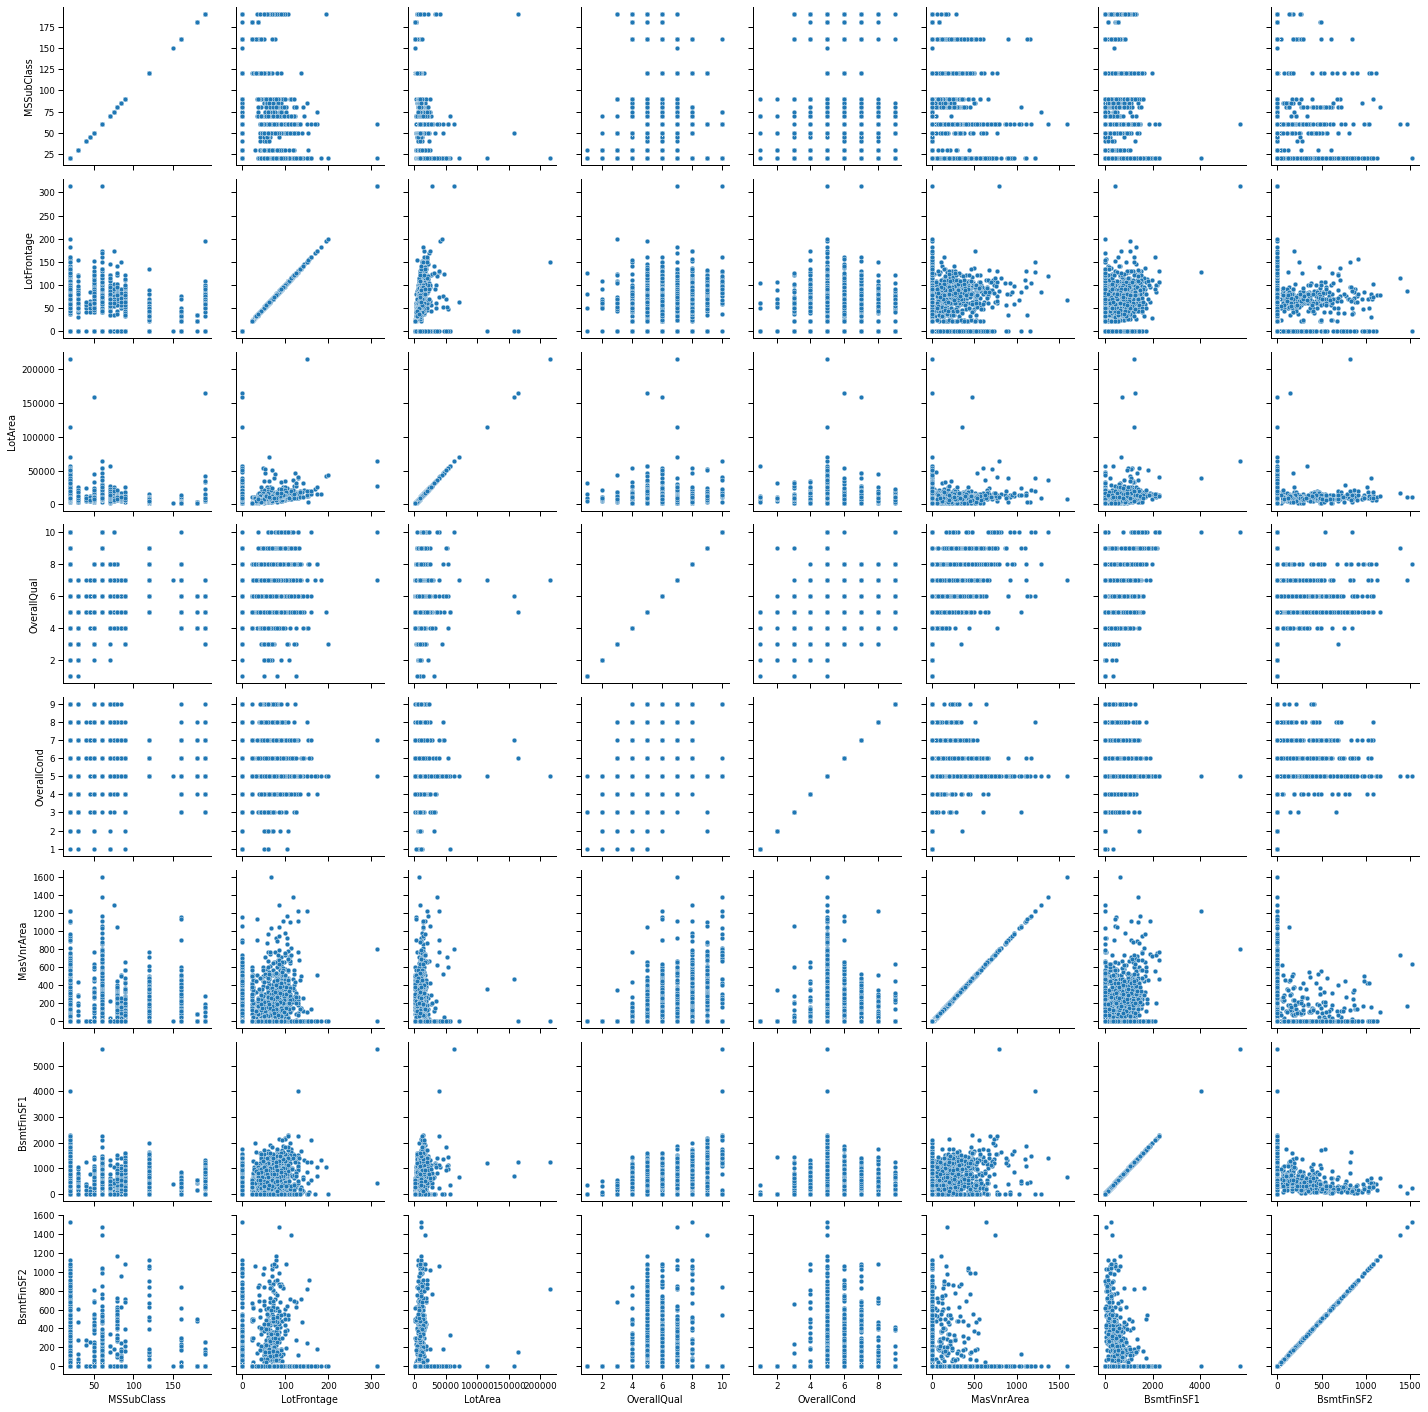

In [75]:
# Let's plot a pairgrid of a subset of numerical features
sub_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']
sub_train_data = train_data[sub_features]

# Plot a pairgrid to study scatter plots 
g = sns.PairGrid(sub_train_data)
g.map(sns.scatterplot)

**Observations AND Conclusions**:
1. Since we would be using decison-tree based estimartors instead of linear models, computing correlation matrix isn't helpful 
2. Also, under the hood, the assumption behind evaluation of Pearrson and Spearmann's correlations is that the distribution of these features WRT to each other should be linear or monotonic
3. As we can see from the above scatterplots, there isn't any linear or monotonic relationship between the features. Hence, we won't be using correlation values for feature selection
4. Since we are using tree-based models for predictions, its better to use ExtraTreesRegressor for feature selection than other linear models. It differs from Random Forest in the way that it considers the entire dataset while botstrapping, whereas the Random Forest considers sampling with replacement. Also, the former is faster as it performs random split in the first instance, whereas the Random Forest computes the best split based on maximum information gain.

In [76]:
# Use Extra Trees Regressor for feature selection
selector = SelectFromModel(estimator=ExtraTreesRegressor(criterion='mse', random_state=seed_value)).fit(train_data, y)
mask = selector.get_support()
feature_names = train_data.columns
new_features = []

for mask_val, feature in zip(mask, feature_names):
    if mask_val == True:
        new_features.append(feature)
        
train_data_1 = selector.fit_transform(train_data, y)
test_data_1 = selector.transform(test_data)

Future Checkboxes:
<p>
<input type="checkbox"> Try KNN Imputer for imputation of categorical columns 
</p>

<p> 
<input type="checkbox"> Try Gradient Boosting algorithms for a better performance
</p>

# **Predictions**

In [77]:
print(train_data.shape)
print(test_data.shape)
print(y.shape)

# Convert training and testing data to pandas DataFrame
train_data_1 = pd.DataFrame(train_data_1)
test_data_1 = pd.DataFrame(test_data_1)
train_data_1.columns, test_data_1.columns = new_features, new_features

# Split the dataset into training and validation sets (according to feature selection based on ExtraTreesRegressor, which is based upon random feature split)
X_train, X_valid, y_train, y_valid = train_test_split(train_data_1, y, test_size=0.2, random_state=seed_value, shuffle=True)

# Split the dataset into training and validation sets (without the feature selection by ExtraTreesRegressor)
X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(train_data, y, test_size=0.2, random_state=seed_value, shuffle=True)

(2930, 40)
(1459, 40)
(2930,)


In [78]:
# Impute missing values in training and validation datasets
# X_train = pd.DataFrame(X_train)
# X_valid = pd.DataFrame(X_valid)
# X_train.columns = new_features
# X_valid.columns = new_features
X_train = X_train.fillna(0)
X_valid = X_valid.fillna(0)

X_train_1 = X_train_1.fillna(0)
X_valid_1 = X_valid_1.fillna(0)

In [79]:
# Calculate Root-Mean Squared Error
def rmsle(y, preds):
    return np.sqrt(mean_squared_error(y, preds))

# Calculate R-2 and Adjusted R2
def r2_value(dataframe, y, preds):
    no_of_instances = len(dataframe)
    no_of_features = len(dataframe.columns)
    r2score = r2_score(y, preds)
    adj_r2score = 1 - (((1-r2score)*(no_of_instances-1))/(no_of_instances-no_of_features-1))
    return r2score, adj_r2score

***Decision Tree***

In [80]:
# Initialize the regressor 
dt_reg = DecisionTreeRegressor(random_state=seed_value, criterion='mse')
dt_reg.fit(X_train, y_train)
preds_dt = dt_reg.predict(X_valid)

# Calculate rmse score 
rmse_dt = rmsle(y_valid, preds_dt)

# Calculate R2 and Adjusted R2 score
r2_dt, r_adj_dt = r2_value(train_data_1, y_valid, preds_dt)

print(f"The RMSE value for Random Forest Classifier is {rmse_dt}")
print(f"The R2 value for Random Forest Classifier is {r2_dt}")
print(f"The Adjusted R2 value for Random Forest Classifier is {r_adj_dt}")

The RMSE value for Random Forest Classifier is 40564.586403841386
The R2 value for Random Forest Classifier is 0.6867996575546804
The Adjusted R2 value for Random Forest Classifier is 0.6858343140334449


***Random Forest(Hyperparameter Tuning with RandomizedSearch CV + K-Fold Cross Validation)***

In [81]:
# Initialize Random Forest Regressor
random_reg = RandomForestRegressor(bootstrap=True, oob_score=True, criterion='mse', random_state=seed_value, verbose=2)
random_reg.fit(X_train, y_train)
preds = random_reg.predict(X_valid)

# Calculate rmse score
rmse_rf = rmsle(y_valid, preds)

# Calculate R2 and Adjusted R2 scores
r2_rf, adj_r2_rf = r2_value(train_data_1, y_valid, preds)


print(f"The RMSE value for Random Forest Regressor is {rmse_rf}")
print(f"The R2 value for Random Forest Regressor is {r2_rf}")
print(f"The Adjusted R2 value for Random Forest Regressor is {adj_r2_rf}")

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [82]:
# Initialize Random Forest Regressor
random_reg_1 = RandomForestRegressor(bootstrap=True, oob_score=True, criterion='mse', random_state=seed_value, verbose=2)
random_reg_1.fit(X_train_1, y_train_1)
preds_1 = random_reg_1.predict(X_valid_1)

# Calculate rmse score
rmse_rf_1 = rmsle(y_valid_1, preds_1)

# Calculate R2 and Adjusted R2 scores
r2_rf_1, adj_r2_rf_1 = r2_value(train_data_1, y_valid_1, preds_1)


print(f"The RMSE value for Random Forest Regressor is {rmse_rf_1}")
print(f"The R2 value for Random Forest Regressor is {r2_rf_1}")
print(f"The Adjusted R2 value for Random Forest Regressor is {adj_r2_rf_1}")

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 10

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [83]:
# Printing the estimator for this model 
print(random_reg_1.base_estimator_)

# Print training set out-of-sample score
print(random_reg_1.oob_score_)

DecisionTreeRegressor()
0.8940700908854811


In [84]:
# Use GridSearchCV for best combination of hyperparameters and check if our model generalizes further
# Use the entire dataset for training here as it would enable the model to learn from a larger pool of training instances 

# Initialize K-Fold Cross-Validation 
cv = KFold(shuffle=True, random_state=seed_value)

params_random_reg = {
    'n_estimators': [estim for estim in range(100, 500, 50)], 
    'max_depth': [depth for depth in range(10, 100, 5)], 
    'min_samples_leaf': [min_leaves for min_leaves in range(50, 100, 5)], 
    'max_samples': [min_samp for min_samp in range(100, 500, 50)], 
    'max_features': ['sqrt', 'log2', 'auto']
}

param_random_reg_2 = {
                        'bootstrap': [True, False],
                        'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                        'max_features': ['auto', 'sqrt'],
                        'min_samples_leaf': [1, 2, 4],
                        'min_samples_split': [2, 5, 10],
                        'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

# random_model = GridSearchCV(random_reg, param_grid = params_random_reg, cv=cv)
# random_model.fit(train_data, y)

In [85]:
# Grid Search CV is taking too much time
# Reinitialize another random forest model 
# Let's use Randomized Search CV and use it to for estimating the range of values to be used in GridSearch CV 
# rf_reg_2 = RandomForestRegressor(random_state=seed_value)
# random_model_2 = RandomizedSearchCV(rf_reg_2, n_iter=20, param_distributions = param_random_reg_2, cv=cv)
# random_model_2.fit(train_data, y)
# Get the best parameter values 
# print(random_model_2.best_params_)
# print(random_model_2.best_score_)

In [86]:
# Let's estimate validation set on this range of hyperparameters
final_random_model = RandomForestRegressor(n_estimators=300, min_samples_leaf=55, max_samples=400, max_features='log2', max_depth=45)
final_random_model.fit(X_train, y_train)
preds_val_3 = final_random_model.predict(X_valid)
rmse_val_3 = rmsle(y_valid, preds_val_3)
r2_val_3, adj2_val_3 = r2_value(train_data, y_valid, preds_val_3)

print(f"The RMSE value for tuned Random Forest Classifier is {rmse_val_3}")
print(f"The R2 value for tuned Random Forest Classifier is {r2_val_3}")
print(f"The Adjusted R2 value for Random Forest Classifier is {adj2_val_3}")

The RMSE value for tuned Random Forest Classifier is 37667.09846806939
The R2 value for tuned Random Forest Classifier is 0.7299448533104617
The Adjusted R2 value for Random Forest Classifier is 0.7262057720132717


**Observations**:
1. After obtaining the best set of parameters through Randomized Search CV, the R2 and adjusted R2 value got reduced. Also the score for test set got reduced on submission. 
2. Maybe its is due to the fact that since the model selection tool has randomly initialized a set of parameters, without fitting each of the model to the dataset. The 
   resultant model hence, doesn't generalize well 

In [87]:
# Understanding feature importances of independent variables
importance = random_reg_1.feature_importances_
feat_importances = pd.Series(importance, index=train_data.columns)
feat_importances.sort_values(ascending=False)

OverallQual           0.643775
GrLivArea             0.111994
TotalBsmtSF           0.034189
1stFlrSF              0.032932
BsmtFinSF1            0.022555
2ndFlrSF              0.020120
LotArea               0.017518
YearBuilt             0.016476
FullBath              0.010677
GarageYrBlt           0.009354
OpenPorchSF           0.007558
GarageArea            0.006714
GarageCars            0.006429
OverallCond           0.005648
MasVnrArea            0.005356
BsmtUnfSF             0.005254
LotFrontage_median    0.005034
MoSold                0.004612
LotFrontage_fill      0.004374
WoodDeckSF            0.003976
ScreenPorch           0.003373
LotFrontage           0.003289
TotRmsAbvGrd          0.003079
Fireplaces            0.002612
MSSubClass            0.002155
YrSold                0.002107
BedroomAbvGr          0.001839
Fireplaces_impute     0.001673
BsmtFullBath          0.001431
EnclosedPorch         0.000736
HalfBath_impute       0.000667
BsmtFinSF2            0.000651
HalfBath

**Observations:**
1. Except for some top 10-12 features, rest of them have a negligible impact on prediction of house prices. 
2. From some preliminary observations, rating of the overall material and finish of the house has a largest bearing on final house prices
3. Rest of the features have a reduced impact

In [88]:
# Let's verify these results with an F-test 
fs_imp_verify = pd.DataFrame()
test = f_regression(X_train, y_train)
fs_imp_verify['Feature'] = train_data_1.columns
fs_imp_verify['Critical Value'] = test[0]
fs_imp_verify['P-Value'] = test[1]
fs_imp_verify.sort_values('P-Value')
fs_imp_verify

,Feature,Critical Value,P-Value
0,OverallQual,4127.169594,0.000000e+00
1,YearBuilt,1037.996203,7.914213e-189
2,TotalBsmtSF,1539.211553,3.335615e-259
3,1stFlrSF,1471.955682,2.623726e-250
4,GrLivArea,2356.520232,0.000000e+00
5,FullBath,1004.916635,8.035334e-184
6,GarageCars,1684.697207,6.266971e-278
7,GarageArea,1684.697207,6.266971e-278
8,Fireplaces_impute,704.798442,5.490645e-136


**Observations**:
1. Here we have used the F-Test to verify the feature importance values provided by the random forest regressor 
2. The test verifies that MsSubClass is indeed the most important feature for calculation of house prices

**Observations**
1. By adding the additional training data, the overall R2 and adjusted R2 values have decreased, probably due to increase in number of training instances
2. Performing data augmentation has enabled the model to generalize better, as evident from the improved test set score

**Defining Cross-Validation and all possible regression evaluation metrics in the notebook**

In [89]:
# Define Cross Validation and other relatable metrics here. The cell has been deleted
# ridge_regressor = Ridge() 
# params = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
# scaler = RobustScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

In [90]:
# grid_ridge = GridSearchCV(ridge_regressor, param_grid=params, cv=kfold, n_jobs=-1, scoring='neg_mean_squared_error')
# grid_ridge.fit(X_train, y_train)
# alpha = grid_ridge.best_params_
# ridge_score = grid_ridge.best_score_
# print(alpha)
# print(ridge_score)

In [91]:
# regressor_ridge_best = Ridge(alpha=0.01, fit_intercept='True', solver='cholesky')
# regressor_ridge_best.fit(X_train, y_train)
# predictions = regressor_ridge_best.predict(X_val)

In [92]:
# eval = rmsle(y_val, predictions)
# r2_score(y_val, predictions) #defined as (1 - (SSres/SStot.))

In [93]:
# regressor_ridge_best.fit(X, y)
# predictions_final = regressor_ridge_best.predict(X_test)

In [94]:
# Impute 'Missing' with '0' as there are only a few of these values
# for index in test_data.index:
#     test_data['BsmtFullBath'] = np.where(test_data['BsmtFullBath']=='Missing', 0, test_data['BsmtFullBath'])
#     test_data['BsmtHalfBath'] = np.where(test_data['BsmtHalfBath']=='Missing', 0, test_data['BsmtHalfBath'])


# Now cast the 'object' columns as 'float' types
# convert_dtypes = {
#                     'BsmtFullBath': 'float64',
#                     'BsmtHalfBath': 'float64', 
#                     'BsmtFinSF1' : 'float64', 
#                     'BsmtFinSF2' : 'float64', 
#                     'BsmtUnfSF' : 'float64', 
#                     'TotalBsmtSF': 'float64', 
#                }
# test_data = test_data.astype(convert_dtypes)

# Retraining model with reduced number of features

In [95]:
# Taking only the first six features with maximum feature importances and re-training the model 
# Re-Iterate and keep including features unless R2 score close to the best performed model has been attained
imp_features = [
                    'OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'BsmtFinSF1', '2ndFlrSF', 'LotArea', 
                'YearBuilt', 'FullBath', 'GarageYrBlt', 'OpenPorchSF', 'GarageArea', 'GarageCars', 'OverallCond', 
               ]
X_train_new = X_train_1[imp_features]
X_valid_new = X_valid_1[imp_features]

# Again Initialize Random Forest Regressor
random_prob = RandomForestRegressor(bootstrap=True, oob_score=True, criterion='mse', random_state=seed_value, verbose=2)
random_prob.fit(X_train_new, y_train_1)
preds_prob = random_prob.predict(X_valid_new)

# Calculate rmse score
rmse_rf_prob = rmsle(y_valid_1, preds_prob)

# Calculate R2 and Adjusted R2 scores
r2_rf_prob, adj_r2_rf_prob = r2_value(X_train_new, y_valid_1, preds_prob)


print(f"The RMSE value for Random Forest Regressor is {rmse_rf_prob}")
print(f"The R2 value for Random Forest Regressor is {r2_rf_prob}")
print(f"The Adjusted R2 value for Random Forest Regressor is {adj_r2_rf_prob}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


**Observations**:
1. Hence, by just including fourteen most important features for the training dataset, there is a marginal increase in R2 and adjusted R2 scores. With more features, adjusted R2 value goes down indicating that incoming features are redundant and add no significant value to the model

***We have got a pretty appreciable R2 and adjusted R2 score on the training dataset. Let's predict for the test dataset***

In [96]:
preds_final = random_prob.predict(test_data[imp_features])

# Submission of final predictions 
submission = pd.read_csv('datasets/sample_submission.csv')
submission.iloc[:, 1] = preds_final
submission.to_csv("datasets/submission_prediction.csv", index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


# Save Models

In [97]:
# The final model that will be used for deployment
filename = 'rf_dep.pkl'
pickle.dump(random_prob, filename)

['rf_dep.pkl']

In [2]:
filename = "saved_models/rf_dep.pkl"
model = pickle.load(open(filename, "rb"))
preds = model.predict([[2, 2000, 345, 678, 890, 8900, 234, 5673, 7890, 78, 2022, 23450, 45, 3]])
print(preds[0])

175778.62


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
